<a href="https://colab.research.google.com/github/MaryamMortazaviSefat/new/blob/main/q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#load data
!wget -q https://raw.githubusercontent.com/MaryamMortazaviSefat/practice2_Prediction-of-Persian-Numbers/refs/heads/main/data_hoda.py
!wget -q https://github.com/MaryamMortazaviSefat/practice2_Prediction-of-Persian-Numbers/raw/refs/heads/main/dataset/Data_hoda_full.mat -P dataset

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
from data_hoda import load_hoda
import random

In [3]:
x_train,y_train,x_test,y_test=load_hoda(size=25)

In [4]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [5]:
class Autoencoder(Model):
    def __init__(self, latent_dim, shape):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim
        self.shape = shape
        self.encoder = tf.keras.Sequential([
            layers.Flatten(),
            layers.Dense(latent_dim, activation='relu'),
        ])
        self.decoder = tf.keras.Sequential([
            layers.Dense(np.prod(shape), activation='sigmoid'),
            layers.Reshape(shape)
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

shape = (625,)
latent_dim = 2
autoencoder = Autoencoder(latent_dim, shape)


In [6]:
autoencoder.compile(optimizer='adam',loss=losses.BinaryCrossentropy)


In [7]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.6905 - val_loss: 0.6677
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6635 - val_loss: 0.6224
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6252 - val_loss: 0.5976
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6084 - val_loss: 0.5842
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5952 - val_loss: 0.5741
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5866 - val_loss: 0.5620
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5693 - val_loss: 0.5493
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5582 - val_loss: 0.5403
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5468 - val_loss: 0.5346
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5405 - val_loss: 0.5311
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5393 - val_loss: 0.5288
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5347 - val_lo

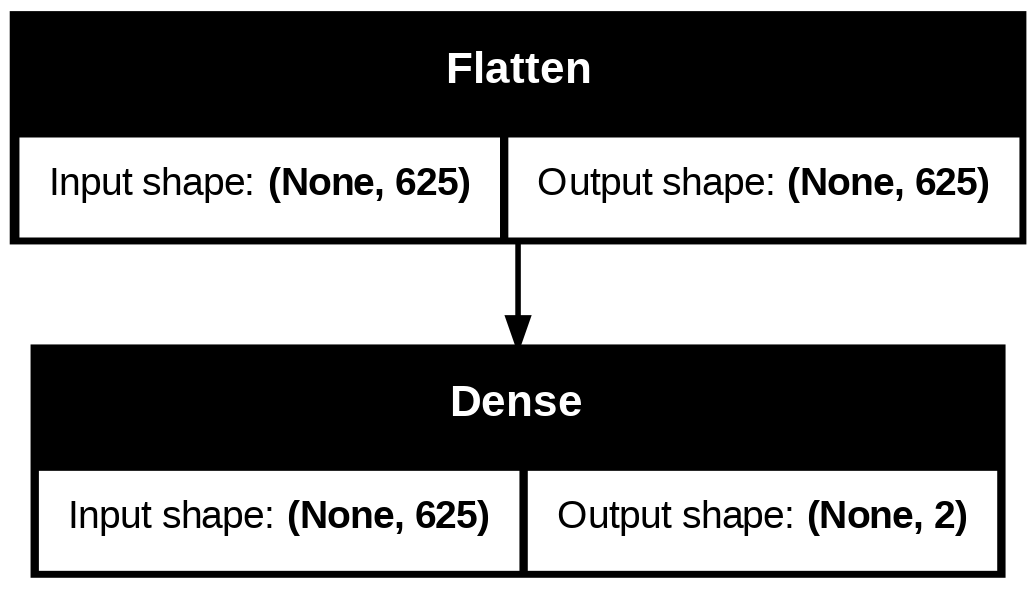

In [8]:
keras.utils.plot_model(autoencoder.encoder,show_shapes=True)

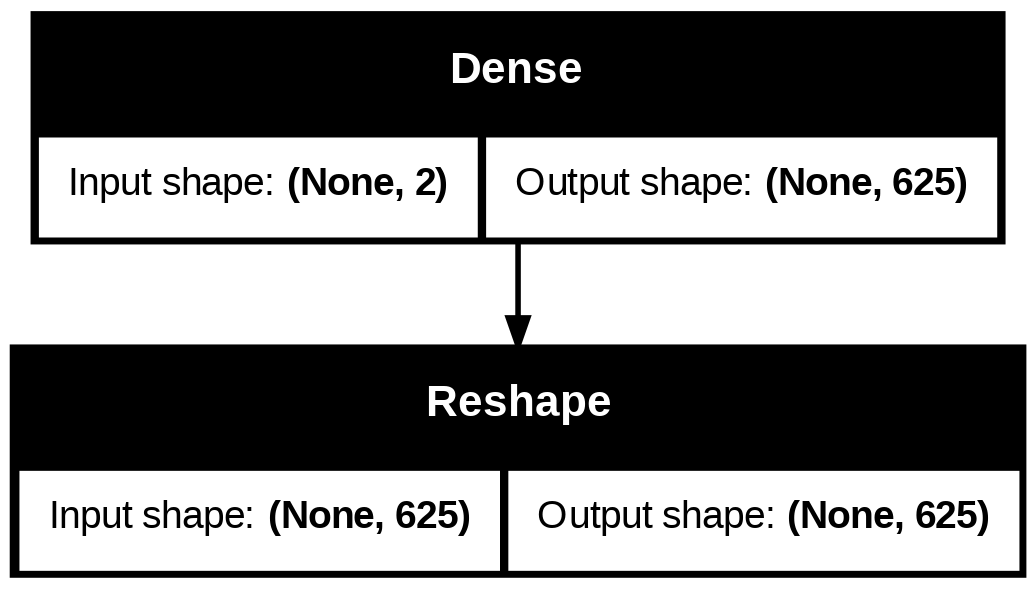

In [9]:
keras.utils.plot_model(autoencoder.decoder,show_shapes=True)

In [10]:
pred=autoencoder.predict(x_train)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


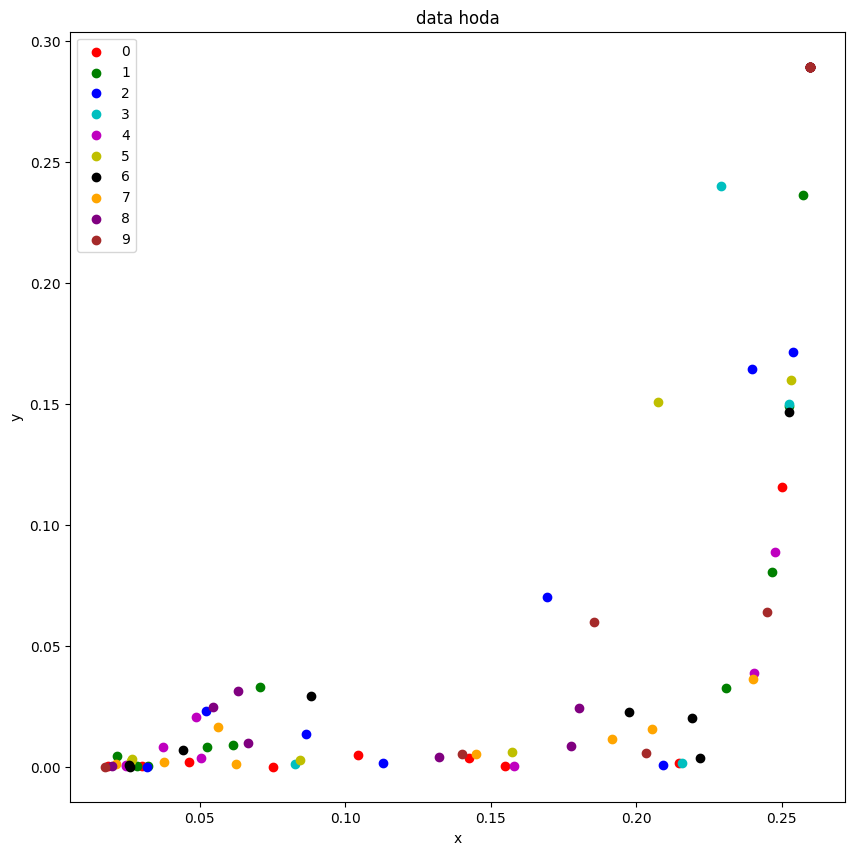

In [11]:
plt.figure(figsize=(10, 10))
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']

for i in range(10):
    index = np.where(y_test == i)[0]
    chosen_indices = random.sample(list(index),10)
    plt.scatter(pred[chosen_indices, 0], pred[chosen_indices, 600], c=colors[i], label=str(i))

plt.title("data hoda")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

تفکیک رنگ ها رضایت بخش نیست

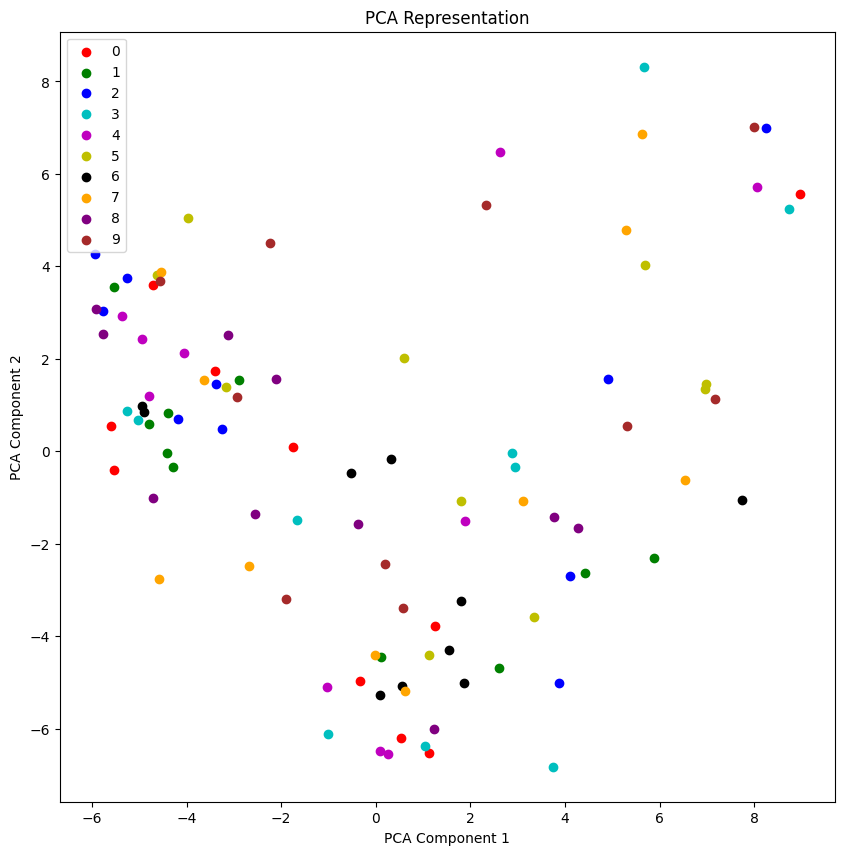

In [13]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train.reshape(len(x_train), -1))

# Visualize PCA results
plt.figure(figsize=(10, 10))

for i in range(10):
    index = np.where(y_test == i)[0]
    chosen_indices = random.sample(list(index), 10)
    plt.scatter(x_train_pca[chosen_indices, 0], x_train_pca[chosen_indices, 1], c=colors[i], label=str(i))

plt.title("PCA Representation")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()